# Theis Example

The objective of this exercise is to learn how to use Python to help calculate drawdown using the Theis equation.  We will be plotting results along the way using matplotlib.

Steps

1. Construct and test a function that allows us to calculate the Theis solution
2. Call the function in a loop and make a plot of drawdown versus distance and drawdown versus time
3. Repeat step 2, but using numpy broadcasting instead
4. Learn how to use the numpy.meshgrid function to create and plot 2d fields
5. Create a two-dimensional contour map and filled contour map of drawdown at a pumping well
6. Create an animation that shows the propagation of pumping at a single well
7. Create a composite drawdown map using a list of wells and pumping rates provided in a table
8. Create an animation of composite drawdown for the multiple wells

In [9]:
# imports

## Step 1. Construct and test a Theis function

The Theis (1935) equation is used to calculate drawdown for two-dimensional radial groundwater flow to a point source in an infinite, homogeneous aquifer. The Theis equation was derived from heat transfer literature (with the mathematical help of C.I. Lubin) and is defined as:

\begin{equation}
s = \frac{Q}{4 \pi T} W(u)
\end{equation}

where  
$s$ is drawdown [L],  
$Q$ is the pumping rate [L$^3$/T],  
$T$ is the aquifer transmissivity [L$^2$/T],  
$u$ is a dimensionless time parameter [unitless], and  
$W(u)$ is the Well function (exponential integral $E_1$) [unitless]. The exponential integral is available in ``scipy.special`` as the ``exp1()`` function.

The dimensionless time parameter is defined as:

\begin{equation}
u = \frac{r^2S}{4Tt}
\end{equation}

where  
$r$ is the distance from the pumping well to a point where drawdown is observed [L],   
$S$ is storativity [unitless], and  
$t$ is the time since pumping began. 

Storativity is defined as:

\begin{equation}
S = S_s b
\end{equation}

where  
$S_s$ is specific storage [1/L] and   
$b$ is the thickness of the aquifer.

To get started with this, we can assume the following parameters:

```
Q = 1000. # cubic feet per day
T = 1000. # feet squared per day
r = 1000. # feet
S = 0.0001 # unitless
t = 100. # days
```

Hint: you should get a calculated drawdown of 0.614.

In [11]:
# theis function
import numpy as np
import matplotlib.pyplot as plt

def theis(Q, T, r, S, t):
    from scipy.special import exp1
    u = r ** 2 * S / 4 / T / t
    s = Q / 4 / np.pi / T * exp1(u)
    return s

Q = 1000. # cubic feet per day
T = 1000. # feet squared per day
r = 1000. # feet
S = 0.0001 # unitless
t = 100. # days
theis(Q, T, r, S, t)

0.6141060292108772

In [ ]:
# test the function with some different values

## Step 2. Call the function in a loop

Create plots of drawdown versus distance and drawdown versus time, by calling the Theis function multiple times in a loop.

In [ ]:
# call the function in a loop by radius and plot the results
Q = 1000. # cubic feet per day
T = 1000. # feet squared per day
r = 1000. # feet
S = 0.0001 # unitless
t = 100. # days

radius = [.1, 1, 10, 100, 1000]
drawdown = []
for r in radius:
    s = theis(Q, T, r, S, t)
    drawdown.append(s)
    print(r, round(s, 4))

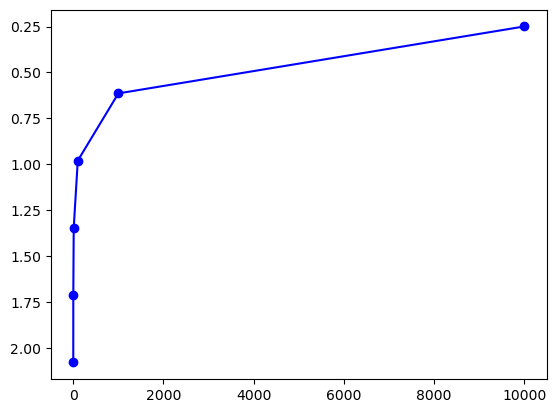

In [15]:
import matplotlib.pyplot as plt
# call the function in a loop by radius and plot the results
Q = 1000. # cubic feet per day
T = 1000. # feet squared per day
r = 1000. # feet
S = 0.0001 # unitless
t = 100. # days
radius = [10 ** i for i in range(-1, 5)]
# radius = [.1, 1, 10, 100, 1000]
drawdown = []
for i in range(len(radius)):
    r = radius[i]
    s = theis(Q, T, r, S, t)
    drawdown.append(s)
plt.plot(radius, drawdown, 'bo-')
plt.gca().invert_yaxis()

In [18]:
# call the function in a loop by time and plot the results
Q = 1000. # cubic feet per day
T = 1000. # feet squared per day
r = 1000. # feet
S = 0.0001 # unitless
t = 100. # days
times = [10 ** i for i in range(-3, 6)]
drawdown = []
for t in times:
    drawdown.append(theis(Q, T, r, S, t))
drawdown

[4.2565191808271254e-14,
 0.0019826661678910133,
 0.08310137162837386,
 0.24959540821048085,
 0.4310510557745736,
 0.6141060292108772,
 0.7973220252305313,
 0.9805541344695882,
 1.1637878551402572]

## Step 3.  Repeat step 2, but using numpy broadcasting instead of loops

In [20]:
# use broadcasting instead
times = [10 ** i for i in range(-3, 6)]
theis(Q, T, r, S, np.array(times))

array([4.25651918e-14, 1.98266617e-03, 8.31013716e-02, 2.49595408e-01,
       4.31051056e-01, 6.14106029e-01, 7.97322025e-01, 9.80554134e-01,
       1.16378786e+00])

## Step 4. Learn how to use numpy.meshgrid

Use numpy.meshgrid to create an x and y grid from 0 to 10000 using a spacing of 20.  If we have a well located at an (x, y) postion of (2500, 2500), calculate the distance to the well for every point in the meshgrid.  Make a plot of the distance using `contourf`.  

In [25]:
# use numpy.meshgrid
x = np.linspace(0, 10000, 5)
y = np.linspace(0, 10000, 5)
xgrid, ygrid = np.meshgrid(x, y)
np.sqrt((xgrid - 2500.) ** 2 + (ygrid - 2500.) ** 2)

array([[ 3535.53390593,  2500.        ,  3535.53390593,  5590.16994375,
         7905.69415042],
       [ 2500.        ,     0.        ,  2500.        ,  5000.        ,
         7500.        ],
       [ 3535.53390593,  2500.        ,  3535.53390593,  5590.16994375,
         7905.69415042],
       [ 5590.16994375,  5000.        ,  5590.16994375,  7071.06781187,
         9013.87818866],
       [ 7905.69415042,  7500.        ,  7905.69415042,  9013.87818866,
        10606.6017178 ]])

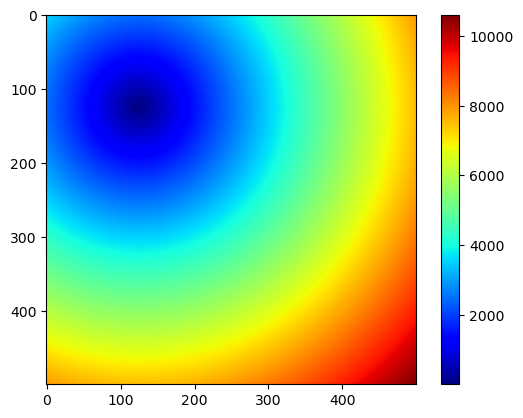

In [31]:
# for each grid point, assign the distance from the cell to the well
xwell = 2500
ywell = 2500
x = np.linspace(0, 10000, 500)
y = np.linspace(0, 10000, 500)
xgrid, ygrid = np.meshgrid(x, y)
r = np.sqrt((xgrid - xwell) ** 2 + (ygrid - ywell) ** 2)
plt.imshow(r, cmap="jet")
plt.colorbar()

## Step 5. Create a two-dimensional plot of drawdown

Use the following parameters
* Q = 1000. cubic feet per day
* T = 1000. feet squared per day
* r = calculated as the distance to the well at (2500, 2500)
* S = 0.0001 unitless
* t = 100. days

Text(0.5, 1.0, 'max drawdown = 1.95')

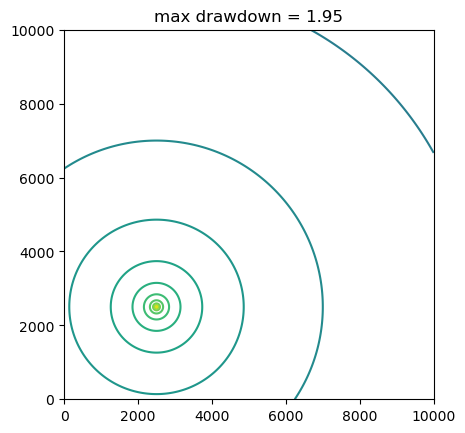

In [41]:
# make map of drawdown
xwell = 2500
ywell = 2500
x = np.linspace(0, 10000, 500)
y = np.linspace(0, 10000, 500)
xgrid, ygrid = np.meshgrid(x, y)
r = np.sqrt((xgrid - xwell) ** 2 + (ygrid - ywell) ** 2)
drawdown = theis(Q, T, r, S, t)
# plt.imshow(drawdown, cmap="jet")
levels = np.linspace(0, drawdown.max(), 20)
plt.contour(xgrid, ygrid, drawdown, levels=levels)
ax = plt.gca()
ax.set_aspect(1)
ax.set_title(f"max drawdown = {drawdown.max():0.2f}")
# plt.colorbar()

## Step 6. Create an animation of two-dimensional drawdown versus time

```
import matplotlib.animation

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
plt.xlabel(r'x')
plt.ylabel(r'y')
times = np.arange(1, 100, 1)
title = ax.set_title(f"Time = {0}")
levels = np.linspace(.1, 1, 10)
cont = ax.contourf(xg, yg, xg * 0., levels=levels)

# animation function
def animate(i):
    global cont
    for c in cont.collections:
        c.remove()
    t = times[i]
    ax.set_title(f"Time = {t} days")
    s = theis_drawdown(Q, T, r, S, t)
    cont = ax.contourf(xg, yg, s, levels=levels)
    return cont  

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=times.shape[0])
plt.close()

from IPython.display import HTML
HTML(anim.to_jshtml())
```

In [45]:
# create animation of drawdown
import matplotlib.animation

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
plt.xlabel(r'x')
plt.ylabel(r'y')
times = np.arange(1, 100, 1)
title = ax.set_title(f"Time = {0}")
levels = np.linspace(.1, 1, 10)
cont = ax.contourf(xgrid, ygrid, xgrid * 0., levels=levels)
plt.colorbar(cont)

# animation function
def animate(i):
    global cont
    for c in cont.collections:
        c.remove()
    t = times[i]
    ax.set_title(f"Time = {t} days")
    s = theis(Q, T, r, S, t)
    cont = ax.contourf(xgrid, ygrid, s, levels=levels)
    return cont  

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=times.shape[0])
plt.close()

from IPython.display import HTML
HTML(anim.to_jshtml())


/var/folders/cf/lj7_5_112m1f2kwydmkjzjjjjtf4x8/T/ipykernel_28570/973497631.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cont.collections:


## Step 7.  Create a drawdown map for multiple wells

Using the wells in the following table, create a two-dimensional drawdown map

| Name | x | y | Pumping Rate|
| --- | --- | --- | --- |
| WELL1 | 49988.2 | 40903.66 | 605.0 |
| WELL2 | 42195.49 | 5996.99 | 12.0 |
| WELL3 | 14583.68 | 15884.9 | 716.0 |
| WELL4 | 34448.56 | 27964.24 | 334.0 |
| WELL5 | 22419.85 | 31224.71 | 100.0 |
| WELL6 | 32417.15 | 4822.61 | 439.0 |
| WELL7 | 16320.24 | 13385.98 | 694.0 |
| WELL8 | 45323.84 | 36436.13 | 651.0 |
| WELL9 | 28248.69 | 39668.15 | 558.0 |
| WELL10 | 11045.92 | 31436.03 | 418.0 |
| WELL11 | 10566.4 | 8672.29 | 730.0 |
| WELL12 | 695.16 | 33597.84 | 268.0 |
| WELL13 | 9036.03 | 2583.99 | 312.0 |
| WELL14 | 44124.26 | 35123.48 | 483.0 |
| WELL15 | 22434.9 | 35106.7 | 845.0 |
| WELL16 | 22566.33 | 33533.98 | 506.0 |
| WELL17 | 2285.95 | 1383.14 | 62.0 |

In addition to the values in the table, using the following parameters

```
T = 1000. # feet squared per day
S = 0.0001 # unitless
t = 10. # days
```

In [46]:
# use this code to parse the wells into a list
well_text = """WELL1 49988.2 40903.66 605.0
WELL2 42195.49 5996.99 12.0
WELL3 14583.68 15884.9 716.0
WELL4 34448.56 27964.24 334.0
WELL5 22419.85 31224.71 100.0
WELL6 32417.15 4822.61 439.0
WELL7 16320.24 13385.98 694.0
WELL8 45323.84 36436.13 651.0
WELL9 28248.69 39668.15 558.0
WELL10 11045.92 31436.03 418.0
WELL11 10566.4 8672.29 730.0
WELL12 695.16 33597.84 268.0
WELL13 9036.03 2583.99 312.0
WELL14 44124.26 35123.48 483.0
WELL15 22434.9 35106.7 845.0
WELL16 22566.33 33533.98 506.0
WELL17 2285.95 1383.14 62.0
"""

# Create the list of wells
well_list = []
for w in well_text.splitlines():
    w = w.split()
    t = (w[0], float(w[1]), float(w[2]), float(w[3]))
    well_list.append(t)
well_list

[('WELL1', 49988.2, 40903.66, 605.0),
 ('WELL2', 42195.49, 5996.99, 12.0),
 ('WELL3', 14583.68, 15884.9, 716.0),
 ('WELL4', 34448.56, 27964.24, 334.0),
 ('WELL5', 22419.85, 31224.71, 100.0),
 ('WELL6', 32417.15, 4822.61, 439.0),
 ('WELL7', 16320.24, 13385.98, 694.0),
 ('WELL8', 45323.84, 36436.13, 651.0),
 ('WELL9', 28248.69, 39668.15, 558.0),
 ('WELL10', 11045.92, 31436.03, 418.0),
 ('WELL11', 10566.4, 8672.29, 730.0),
 ('WELL12', 695.16, 33597.84, 268.0),
 ('WELL13', 9036.03, 2583.99, 312.0),
 ('WELL14', 44124.26, 35123.48, 483.0),
 ('WELL15', 22434.9, 35106.7, 845.0),
 ('WELL16', 22566.33, 33533.98, 506.0),
 ('WELL17', 2285.95, 1383.14, 62.0)]

Processing well:  WELL1
Processing well:  WELL2
Processing well:  WELL3
Processing well:  WELL4
Processing well:  WELL5
Processing well:  WELL6
Processing well:  WELL7
Processing well:  WELL8
Processing well:  WELL9
Processing well:  WELL10
Processing well:  WELL11
Processing well:  WELL12
Processing well:  WELL13
Processing well:  WELL14
Processing well:  WELL15
Processing well:  WELL16
Processing well:  WELL17


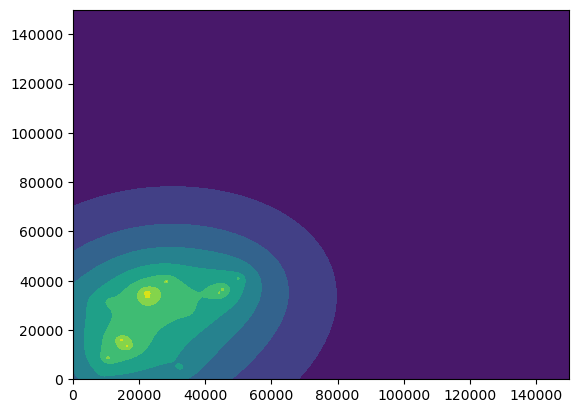

In [59]:
# calculate and plot drawdown for all the wells
Q = rate
T = 1000.
t = 100.
x = np.linspace(0, 150000, 500)
y = np.linspace(0, 150000, 500)
xgrid, ygrid = np.meshgrid(x, y)

cumulative_drawdown = np.zeros(xgrid.shape)
for well_info in well_list:
    wellname, xwell, ywell, Q = well_info
    print("Processing well: ", wellname)
    r = np.sqrt((xgrid - xwell) ** 2 + (ygrid - ywell) ** 2)
    drawdown = theis(Q, T, r, S, t)
    # cumulative_drawdown = cumulative_drawdown + drawdown
    cumulative_drawdown += drawdown

plt.contourf(xgrid, ygrid, cumulative_drawdown)

## Step 8. Create animation of drawdown for multiple wells

You may adapt the following code for this animation.

```
import matplotlib.animation

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
plt.xlabel(r'x')
plt.ylabel(r'y')
times = np.arange(1, 100, 1)
title = ax.set_title(f"Time = {0}")
levels = np.linspace(.1, 2, 20)
cont = ax.contourf(xg, yg, xg * 0., levels=levels)

# animation function
def animate(i):
    global cont
    for c in cont.collections:
        c.remove()
    t = times[i]
    ax.set_title(f"Time = {t} days")
    s = get_drawdown(well_list, t, xg, yg)
    cont = ax.contourf(xg, yg, s, levels=levels)
    return cont  

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=times.shape[0])
plt.close()

from IPython.display import HTML
HTML(anim.to_jshtml())
```

In [ ]:
# create animation